In [18]:
import glob, os
import numpy as np
import matplotlib.pyplot as plt
os.chdir("/git")

# Batch Size changes

## MNIST

2
2
2
2
2


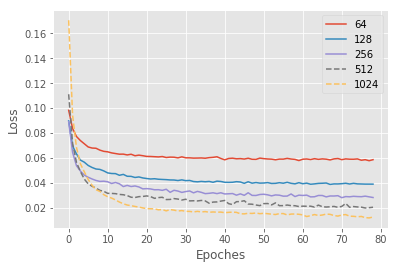

In [67]:
dataset='MNIST'
parts=3
i=0
coefficients=[64,128,256,512, 1024]
plt.style.use('ggplot')
FilePath='/git/Results/BatchSizeComp/'    
FilePathAnthor='/git/Results/BatchSizeCompAnother/'    

filelist=['MNIST[64, 1]TrainConvergenceChanges.npy',
'MNIST[128, 1]TrainConvergenceChanges.npy',
'MNIST[256, 1]TrainConvergenceChanges.npy',
'MNIST[512, 1]TrainConvergenceChanges.npy',
'MNIST[1024, 1]TrainConvergenceChanges.npy']

 
for i in range(5):
    TestLoss=[]
    TestLoss.append(np.load(FilePath+filelist[i]))
    TestLoss.append(np.load(FilePathAnthor+filelist[i]))
    print(len(TestLoss))
    TestConvergenceAvg=[sum(x)/len(TestLoss) for x in zip(*TestLoss)]
    np.save(FilePath+filelist[i],TestConvergenceAvg)
    
    TestLossEpoches=TestLoss
    if i<parts:
        plt.plot(TestConvergenceAvg[1:80], lw=1.5)
    else:
        plt.plot(TestConvergenceAvg[1:80],'--', lw=1.5)


plt.xlabel('Epoches')
plt.ylabel('Loss')

plt.legend(tuple(coefficients))
plt.savefig(FilePath+'TrainBatchSizeCompare_{}.png'.format(dataset),dpi=600)

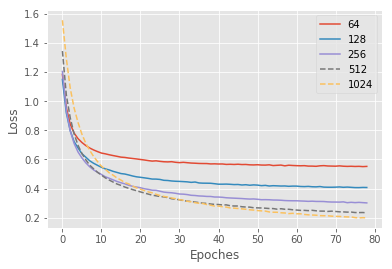

In [81]:
parts=3
i=0
coefficients=[64,128,256,512,1024]
plt.style.use('ggplot')
FilePath='/git/Results/BatchSizeComp/'    

flielist=[ 'MNIST[64, 1]TestConvergenceChanges.npy','MNIST[128, 1]TestConvergenceChanges.npy',
          'MNIST[256, 1]TestConvergenceChanges.npy','MNIST[512, 1]TestConvergenceChanges.npy',
          'MNIST[1024, 1]TestConvergenceChanges.npy']

for i in range(5):
    TestLoss=np.load(FilePath+filelist[i])
    TestLossEpoches=TestLoss
    if i<parts:
        plt.plot(TestLossEpoches[1:80], lw=1.5)
    else:
        plt.plot(TestLossEpoches[1:80],'--', lw=1.5)


plt.xlabel('Epoches')
plt.ylabel('Loss')

plt.legend(tuple(coefficients))
plt.savefig(FilePath+'TestBatchSizeCompare_{}.png'.format(dataset),dpi=600)

## CIFAR10

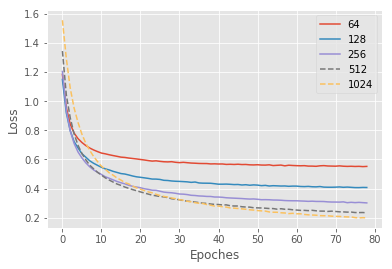

In [76]:
parts=3
i=0
coefficients=[64,128,256,512, 1024]
plt.style.use('ggplot')
FilePath='Results/BatchSizeComp/'    

filelist=['CIFAR10[64, 1]TrainConvergenceChanges.npy','CIFAR10[128, 1]TrainConvergenceChanges.npy','CIFAR10[256, 1]TrainConvergenceChanges.npy',
         'CIFAR10[512, 1]TrainConvergenceChanges.npy', 'CIFAR10[1024, 1]TrainConvergenceChanges.npy']
    
for i in range(5):
    TestLoss=np.load(FilePath+filelist[i])
    TestLossEpoches=TestLoss
    if i<parts:
        plt.plot(TestLossEpoches[1:80], lw=1.5)
    else:
        plt.plot(TestLossEpoches[1:80],'--', lw=1.5)

plt.xlabel('Epoches')
plt.ylabel('Loss')

plt.legend(tuple(coefficients))
plt.savefig(FilePath+'TrainBatchSizeCompare_CIFAR10.png',dpi=600)

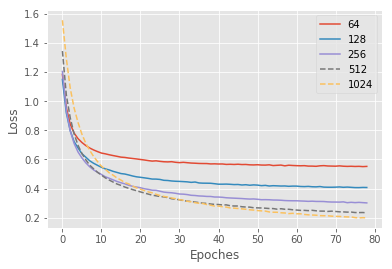

In [73]:
parts=3
i=0
coefficients=[64,128,256,512,1024]
plt.style.use('ggplot')

flielist=['CIFAR10[64, 1]TestConvergenceChanges.npy','CIFAR10[128, 1]TestConvergenceChanges.npy',
          'CIFAR10[256, 1]TestConvergenceChanges.npy', 'CIFAR10[512, 1]TestConvergenceChanges.npy',
                  'CIFAR10[1024, 1]TestConvergenceChanges.npy']

for i in range(5):
    TestLoss=np.load(FilePath+filelist[i])
    TestLossEpoches=TestLoss
    if i<parts:
        plt.plot(TestLossEpoches[1:80], lw=1.5)
    else:
        plt.plot(TestLossEpoches[1:80],'--', lw=1.5)
    i+=1   


plt.xlabel('Epoches')
plt.ylabel('Loss')

plt.legend(tuple(coefficients))
plt.savefig(FilePath+'TestBatchSizeCompare_CIFAR10.png',dpi=600)

## Contraction coefficients changes

In [19]:
from train_base_model import ResumeModel
import torch
import glob, os
import numpy as np
import matplotlib.pyplot as plt
DataFilePath='/git/checkpoint'
SavePath='/git/Results/ContractionCoeffiComp'

Contraction coefficients:0.02, Monte calro times:0
epoch number:61
epoch number:61
epoch number:61
epoch number:61
epoch number:61
epoch number:61
epoch number:61
Contraction coefficients:0.1, Monte calro times:7
Contraction coefficients:0.1, epoch number:61


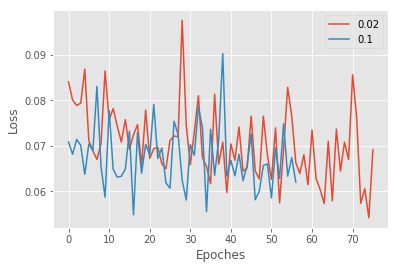

In [98]:
coefficients=[0.02, 0.1]
plt.style.use('ggplot')
parts=2
dataset="MNIST"
FilePath='/git/Results/BatchSizeComp/'    
TestLoss=np.load(FilePath+'MNIST[512, 1]TestConvergenceChanges.npy')
plt.plot(TestLoss[4:80], lw=1.5)

for i in range(len(coefficients)):
    TestConvergenceEpoches=[]
    Monte_iter=0
    for file in glob.glob("{}/*_{}*-ckpt.pth".format(DataFilePath,coefficients[i])):
        [net,TrainConvergence,TestConvergence,start_epoch]=ResumeModel(file)
        print("epoch number:{}".format(len(TestConvergenceAvg)))
        TestConvergenceEpoches.append(TestConvergence)
    lenTest=len(TestConvergenceEpoches)
    print("Contraction coefficients:{}, Monte calro times:{}".format(coefficients[i],lenTest))
    if lenTest>0:
        TestConvergenceAvg=[sum(x)/len(TestConvergenceEpoches) for x in zip(*TestConvergenceEpoches)]
        print("Contraction coefficients:{}, epoch number:{}".format(coefficients[i],len(TestConvergenceAvg)))
        if i<parts:
            pass
            plt.plot(TestConvergenceAvg[4:80], lw=1.5)
        else:
            plt.plot(TestConvergenceAvg[4:80],'--', lw=1.5)
            

plt.xlabel('Epoches')
plt.ylabel('Loss')

plt.legend(tuple(coefficients))
plt.savefig(SavePath+'ContractionCoefficientsCompare_{}_{}.png'.format(dataset,coefficients),dpi=600)

In [20]:
FilePath='Results/ContractionCoeffiComp/'    
parts=3
i=0
coefficients=[0.1, 0.2, 0.4, 0.6,1]
plt.style.use('ggplot')

FlieList=[ 'CIFAR10[512, 0.1]TrainConvergenceChanges.npy', 'CIFAR10[512, 0.2]TrainConvergenceChanges.npy',
'CIFAR10[512, 0.4]TrainConvergenceChanges.npy', 'CIFAR10[512, 0.6]TrainConvergenceChanges.npy',
         'CIFAR10[512, 1]TrainConvergenceChanges.npy']

for i in range(len(FlieList)):
    print(FilePath+FlieList[i])
    TestLoss=np.load(FilePath+FlieList[i])
    TestLossEpoches=TestLoss
    if i<parts:
        plt.plot(TestLossEpoches, lw=1.5)
    else:
        plt.plot(TestLossEpoches,'--', lw=1.5)
    i+=1   


plt.xlabel('Epoches')
plt.ylabel('Loss')

plt.legend(tuple(coefficients))
plt.savefig(FilePath+'ContractionCoefficientsCompare_CIFAR10.png',dpi=600)

Results/ContractionCoeffiComp/CIFAR10[512, 0.1]TrainConvergenceChanges.npy


FileNotFoundError: [Errno 2] No such file or directory: 'Results/ContractionCoeffiComp/CIFAR10[512, 0.1]TrainConvergenceChanges.npy'

In [21]:
FilePath='Results/ContractionCoeffiComp/'    
parts=1
i=0
coefficients=[0.1, 0.2, 0.4, 0.6 ]
plt.style.use('ggplot')
FileList=['CIFAR10[512, 0.1]TestConvergenceChanges.npy','CIFAR10[512, 0.2]TestConvergenceChanges.npy',
          'CIFAR10[512, 0.4]TestConvergenceChanges.npy','CIFAR10[512, 0.6]TestConvergenceChanges.npy',
         'CIFAR10[512, 1]TestConvergenceChanges.npy']
for i in range(5):
    print(FilePath+FlieList[i])
    TestLoss=np.load(FilePath+FlieList[i])
    TestLossEpoches=TestLoss
    if i<parts:
        plt.plot(TestLossEpoches, lw=1.5)
    else:
        plt.plot(TestLossEpoches,'--', lw=1.5)
    i+=1   


plt.xlabel('Epoches')
plt.ylabel('Loss')

plt.legend(tuple(coefficients))
plt.savefig(FilePath+'ContractionCoefficientsCompare_CIFAR10.png',dpi=600)

Results/ContractionCoeffiComp/CIFAR10[512, 0.1]TrainConvergenceChanges.npy


FileNotFoundError: [Errno 2] No such file or directory: 'Results/ContractionCoeffiComp/CIFAR10[512, 0.1]TrainConvergenceChanges.npy'